# Load Model

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ""
from utils import *
from joblib import dump, load
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler, MinMaxScaler

2024-01-17 14:49:30.236409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 14:49:30.376760: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-17 14:49:31.144909: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-17 14:49:31.144987: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [2]:
model_gru = load_model('GRU20-32-b256') #when loading previously saved trained model and weights
model_lstm = load_model('LSTM5-32-b256')
model_lr = load_Sklearn('LR')
model_knn = load_Sklearn('kNN-1viz')

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #qdo carrega modelo salvo
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2024-01-17 14:49:32.746599: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-17 14:49:32.746677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: localhost.localdomain
2024-01-17 14:49:32.746688: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: localhost.localdomain
2024-01-17 14:49:32.746845: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 520.61.5
2024-01-17 14:49:32.746886: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 520.61.5
2024-01-17 14:49:32.746893: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 520.61.5
2024-01-17 14:49:32.747378: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary

Model loaded
Model loaded
Model sklearn loaded
Model sklearn loaded


In [3]:
tests = pd.read_csv('cicddos2019/01-12/export_tests_proc.csv', sep=',')

X_test = tests.iloc[:,0:(tests.shape[1]-1)]                        
y_test = tests.iloc[:,-1]

loaded_scaler: MinMaxScaler = load('Models/minmax_scaler.joblib')

X_test = loaded_scaler.transform(X_test)

# Testing CIC-DDoS2019 

In [4]:
# results = pd.DataFrame(columns=['Method','Accuracy','Precision','Recall', 'F1_Score', 'Average','Normal_Detect_Rate','Atk_Detect_Rate'])
results = []

In [5]:
num_flows = len(X_test)
TEST_FLOWS = 100

## GRU

In [6]:

y_pred = model_gru.predict(format_3d(X_test)) 

start = time.time()
for i in range(TEST_FLOWS):
    sample = X_test[i, :]
    sample = np.expand_dims(sample, axis = 0)
    model_gru.predict(format_3d(sample), verbose = False)
end = time.time()

flow_per_second = TEST_FLOWS / (end - start)
print(f"Flow Per Second: {flow_per_second}")

y_pred = y_pred.round()
 
acc, prec, rec, f1, avrg = testes(model_gru,format_3d(X_test),y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results.append({'Method':'GRU', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Flow_Per_Second': flow_per_second})

9331/9331 [==============================] - 145s 16ms/step
Flow Per Second: 14.608042624808823
9331/9331 [==============================] - 139s 15ms/step - loss: 0.0035 - accuracy: 0.9991
[0.003464707173407078, 0.9991493225097656]

Accuracy
0.999149301020169

Precision
0.9992247345820596

Recall
0.9997548379317968

F1 Score
0.9994897159686759

Average (acc, prec, rec, f1)
0.9994046473756754


## LSTM

In [7]:
y_pred = model_lstm.predict(format_3d(X_test)) 

start = time.time()
for i in range(TEST_FLOWS):
    sample = X_test[i, :]
    sample = np.expand_dims(sample, axis = 0)
    model_lstm.predict(format_3d(sample), verbose = False)
end = time.time()

flow_per_second = TEST_FLOWS / (end - start)
print(f"Flow Per Second: {flow_per_second}")

y_pred = y_pred.round()
 
acc, prec, rec, f1, avrg = testes(model_lstm,format_3d(X_test),y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results.append({'Method':'LSTM', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Flow_Per_Second': flow_per_second})

9331/9331 [==============================] - 140s 15ms/step
Flow Per Second: 14.875174448785106
9331/9331 [==============================] - 133s 14ms/step - loss: 0.0199 - accuracy: 0.9942
[0.019866494461894035, 0.9941924810409546]

Accuracy
0.994192472318791

Precision
0.9956628671617658

Recall
0.9973755601551353

F1 Score
0.9965184777676496

Average (acc, prec, rec, f1)
0.9959373443508355


## LR

In [8]:
y_pred = model_lr.predict(X_test) 

start = time.time()
for i in range(TEST_FLOWS):
    sample = X_test[i, :]
    sample = np.expand_dims(sample, axis = 0)
    model_lr.predict(format_2d(sample))
end = time.time()

flow_per_second = TEST_FLOWS / (end - start)
print(f"Flow Per Second: {flow_per_second}")

y_pred = y_pred.round()
 
acc, prec, rec, f1, avrg = testes(model_lr,X_test,y_test,y_pred,False)

norm, atk = test_normal_atk(y_test,y_pred)

results.append({'Method':'LR', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Flow_Per_Second': flow_per_second})

Flow Per Second: 6082.227378190255

Accuracy
0.9985330466410787


/data/conda/trungct/miniconda3/envs/gru/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/data/conda/trungct/miniconda3/envs/gru/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the p


Precision
0.99901553842012

Recall
0.999224323292406

F1 Score
0.9991199199488829

Average (acc, prec, rec, f1)
0.9989732070756219


## KNN

In [9]:
y_pred = model_knn.predict(X_test) 

start = time.time()
for i in range(TEST_FLOWS):
    sample = X_test[i, :]
    sample = np.expand_dims(sample, axis = 0)
    model_knn.predict(format_2d(sample))
end = time.time()

flow_per_second = TEST_FLOWS / (end - start)
print(f"Flow Per Second: {flow_per_second}")

y_pred = y_pred.round()
 
acc, prec, rec, f1, avrg = testes(model_knn,X_test,y_test,y_pred,False)

norm, atk = test_normal_atk(y_test,y_pred)

results.append({'Method':'kNN', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Flow_Per_Second': flow_per_second})

/data/conda/trungct/miniconda3/envs/gru/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/data/conda/trungct/miniconda3/envs/gru/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/data/conda/trungct/miniconda3/envs/gru/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/data/conda/trungct/miniconda3/envs/gru/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(job

Flow Per Second: 8.674686674992438

Accuracy
0.998888062750772

Precision
0.9996179721964186

Recall
0.9990474850792758

F1 Score
0.9993326472196314

Average (acc, prec, rec, f1)
0.9992215418115244


# Results

In [10]:
order = ['Method','Accuracy','Precision','Recall', 'F1_Score', 'Average','Normal_Detect_Rate','Atk_Detect_Rate', 'Flow_Per_Second']
df = pd.DataFrame.from_dict(results)
df = df[order]

In [11]:
df

,Method,Accuracy,Precision,Recall,F1_Score,Average,Normal_Detect_Rate,Atk_Detect_Rate,Flow_Per_Second
0,GRU,0.999149,0.999225,0.999755,0.999490,0.999405,0.996122,0.999755,14.608043
1,LSTM,0.994192,0.995663,0.997376,0.996518,0.995937,0.978277,0.997376,14.875174
2,LR,0.998533,0.999016,0.999224,0.999120,0.998973,0.995077,0.999224,6082.227378
3,kNN,0.998888,0.999618,0.999047,0.999333,0.999222,0.998091,0.999047,8.674687


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

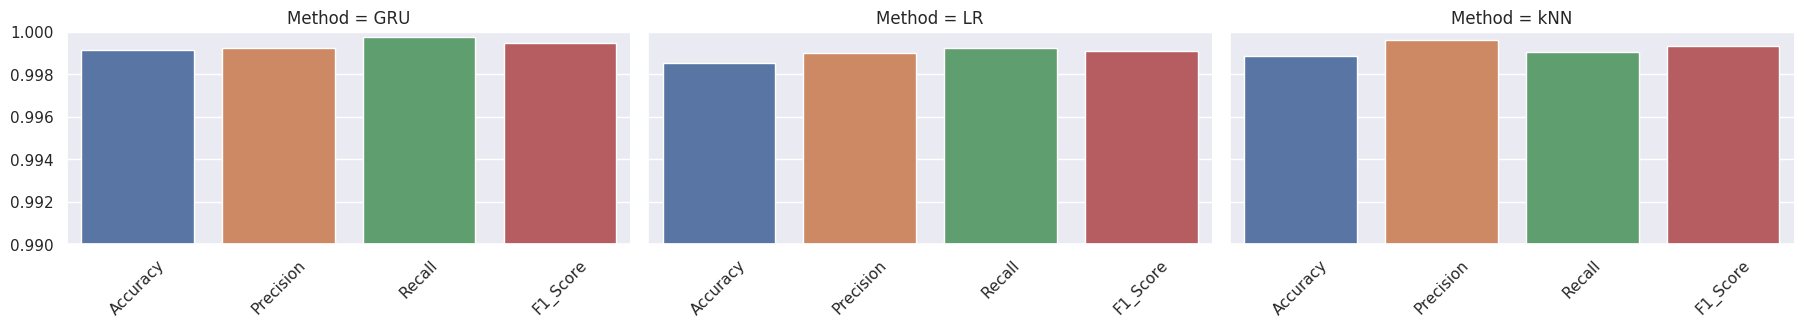

In [13]:
ax = sns.catplot(data=df.iloc[:,:5].query('Method != "LSTM" and Method != "CNN"'), col='Method', col_wrap=3, kind='bar', height=3, aspect=2)
ax.set(ylim=(0.99,1))
ax.set_xticklabels(rotation=45)
ax = ax

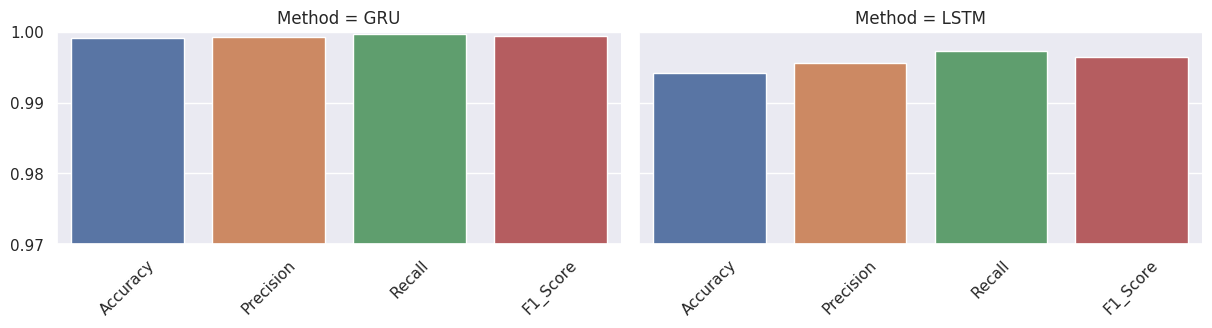

In [14]:
ax = sns.catplot(data=df.iloc[:,:5].query('Method == "LSTM" or Method == "GRU"'), col='Method', col_wrap=3, kind='bar', height=3, aspect=2)
ax.set(ylim=(0.97,1))
ax.set_xticklabels(rotation=45)
ax = ax

Text(0.0, 1.0, 'Average of the Metrics')

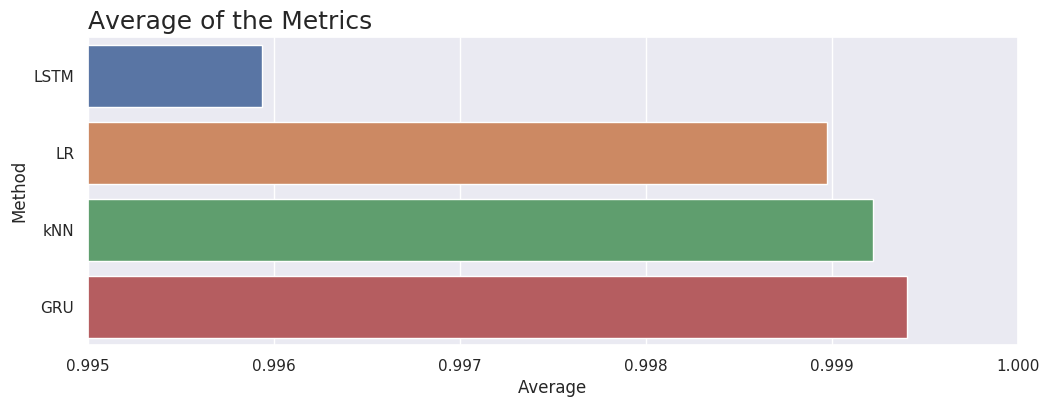

In [23]:
plt.figure(figsize=(12,4))
ax = sns.barplot(data=df.sort_values(by = 'Average'), y='Method', x='Average')
ax.set(xlim=(0.995,1))
ax.set_title('Average of the Metrics', fontsize=18, loc='left')
# ax2 = ax.twiny()
# ax.set(xlim=(0.98,1))
# sns.lineplot(data = df, y='Method', x = 'Flow_Per_Second', ax = ax2)

Text(0.0, 1.0, 'Feature Importance')

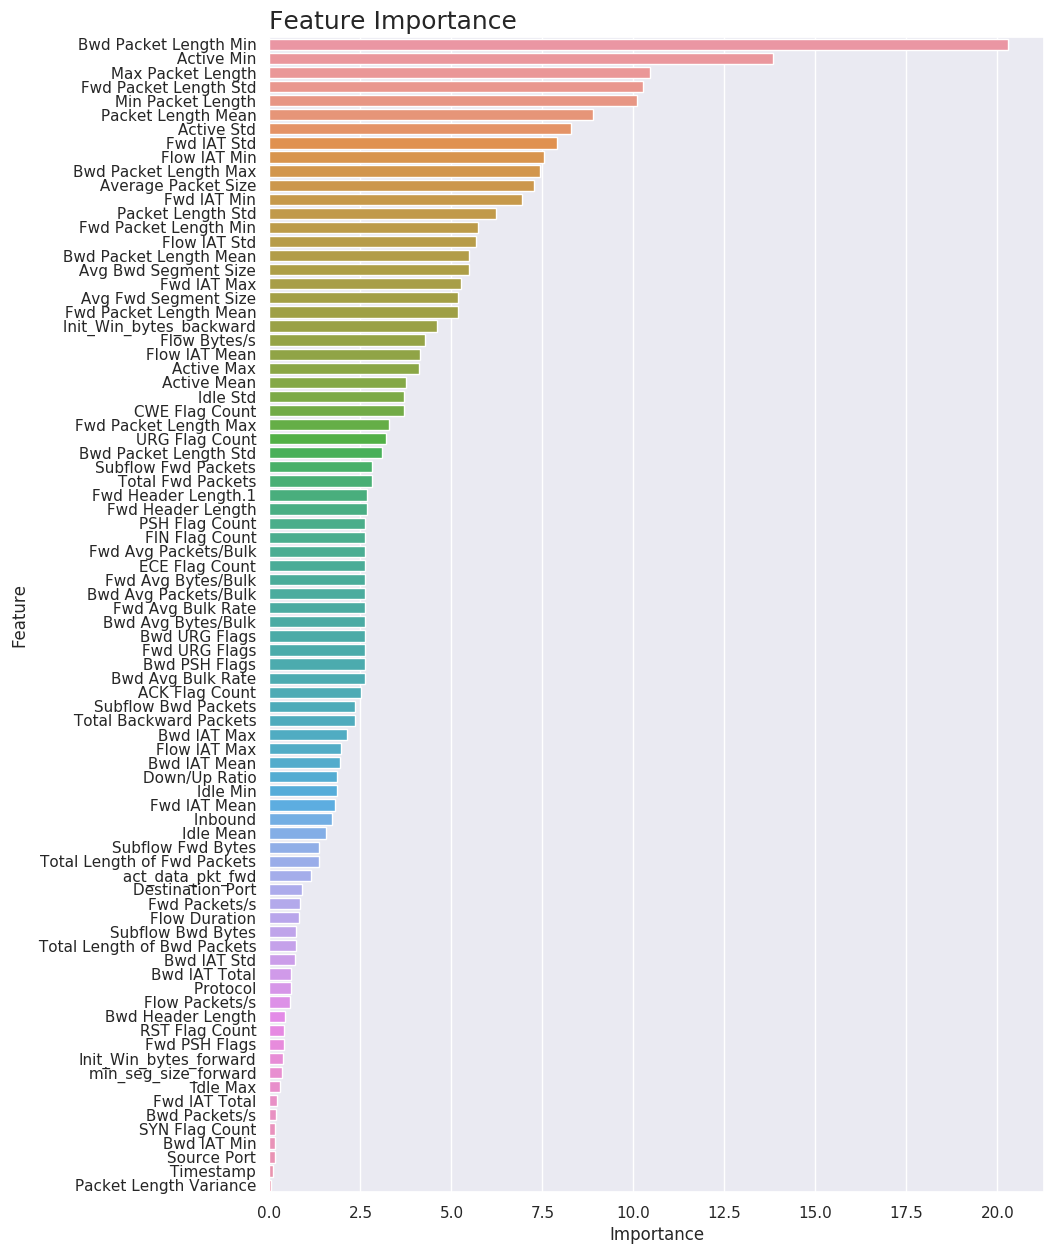

In [31]:
coefficients = model_lr.coef_[0]

plt.figure(figsize=(10,15))

feature_importance = pd.DataFrame({'Feature': list(tests.columns[:-1]), 'Importance': np.abs(coefficients).tolist()})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

ax = sns.barplot(data=feature_importance, y='Feature', x='Importance')
# ax.set(xlim=(0.995,1))
ax.set_title('Feature Importance', fontsize=18, loc='left')
# feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))